# Part 2: Exploratory Data Analysis

## Importing Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotting
import statsmodels.api as sm
from importlib import reload
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 227 # native screen dpi for my computer

## Retrieving Data

In [2]:
files = os.listdir('data/stocks')
stocks = {}
for file in files:
    # Include only csv files
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        stocks[name] = pd.read_csv('data/stocks/'+file, index_col='Date')
        stocks[name].index = pd.to_datetime(stocks[name].index)

### List of Stocks

In [3]:
print('List of stocks:\n')
for i in stocks.keys():
    print(i.upper(), end=' | ')

List of stocks:

CSCO | FCEL | ORCL | EBAY | SBUX | AMZN | INTC | MSFT | UBER | HPQ | EA | NVDA | SIRI | FB | IBM | TWTR | NFLX | TSLA | VMW | LXRX | SQ | SHOP | GOOG | QCOM | AAPL | OSTK | 

In [20]:
stocks['tsla'].head()

Date       Open       High        Low      Close  Adj Close   Volume  \
0  2010-07-28  20.549999  20.900000  20.510000  20.719999  20.719999   467200   
1  2010-07-29  20.770000  20.879999  20.000000  20.350000  20.350000   616000   
2  2010-07-30  20.200001  20.440001  19.549999  19.940001  19.940001   426900   
3  2010-08-02  20.500000  20.969999  20.330000  20.920000  20.920000   718100   
4  2010-08-03  21.000000  21.950001  20.820000  21.950001  21.950001  1230500   

     Return    Change  Volatility        MA7       MA21   Momentum        RSI  \
0  0.008205  0.170000    1.979836  20.718571  19.911904  18.290001  41.752948   
1 -0.020639 -0.369999    1.908327  20.725714  19.743333  17.950001  40.449222   
2 -0.013039 -0.409999    1.839567  20.685714  19.558095  17.549999  38.996148   
3  0.020076  0.979999    1.789358  20.674286  19.508571  17.719999  44.159747   
4  0.043280  1.030001    1.791139  20.768572  19.639524  17.350000  49.041837   

       MACD    Signal  upper_band  lower_band  Sentiment  
0 -0.350607 -0.658177   24.403824   15.419985        NaN  
1 -0.337599 -0.594062   23.858103   15.628563        NaN  
2 -0.356267 -0.546503   23.226171   15.890019        NaN  
3 -0.288656 -0.494933   23.066887   15.950255        NaN  
4 -0.150230 -0.425993   23.349330   15.929718        NaN

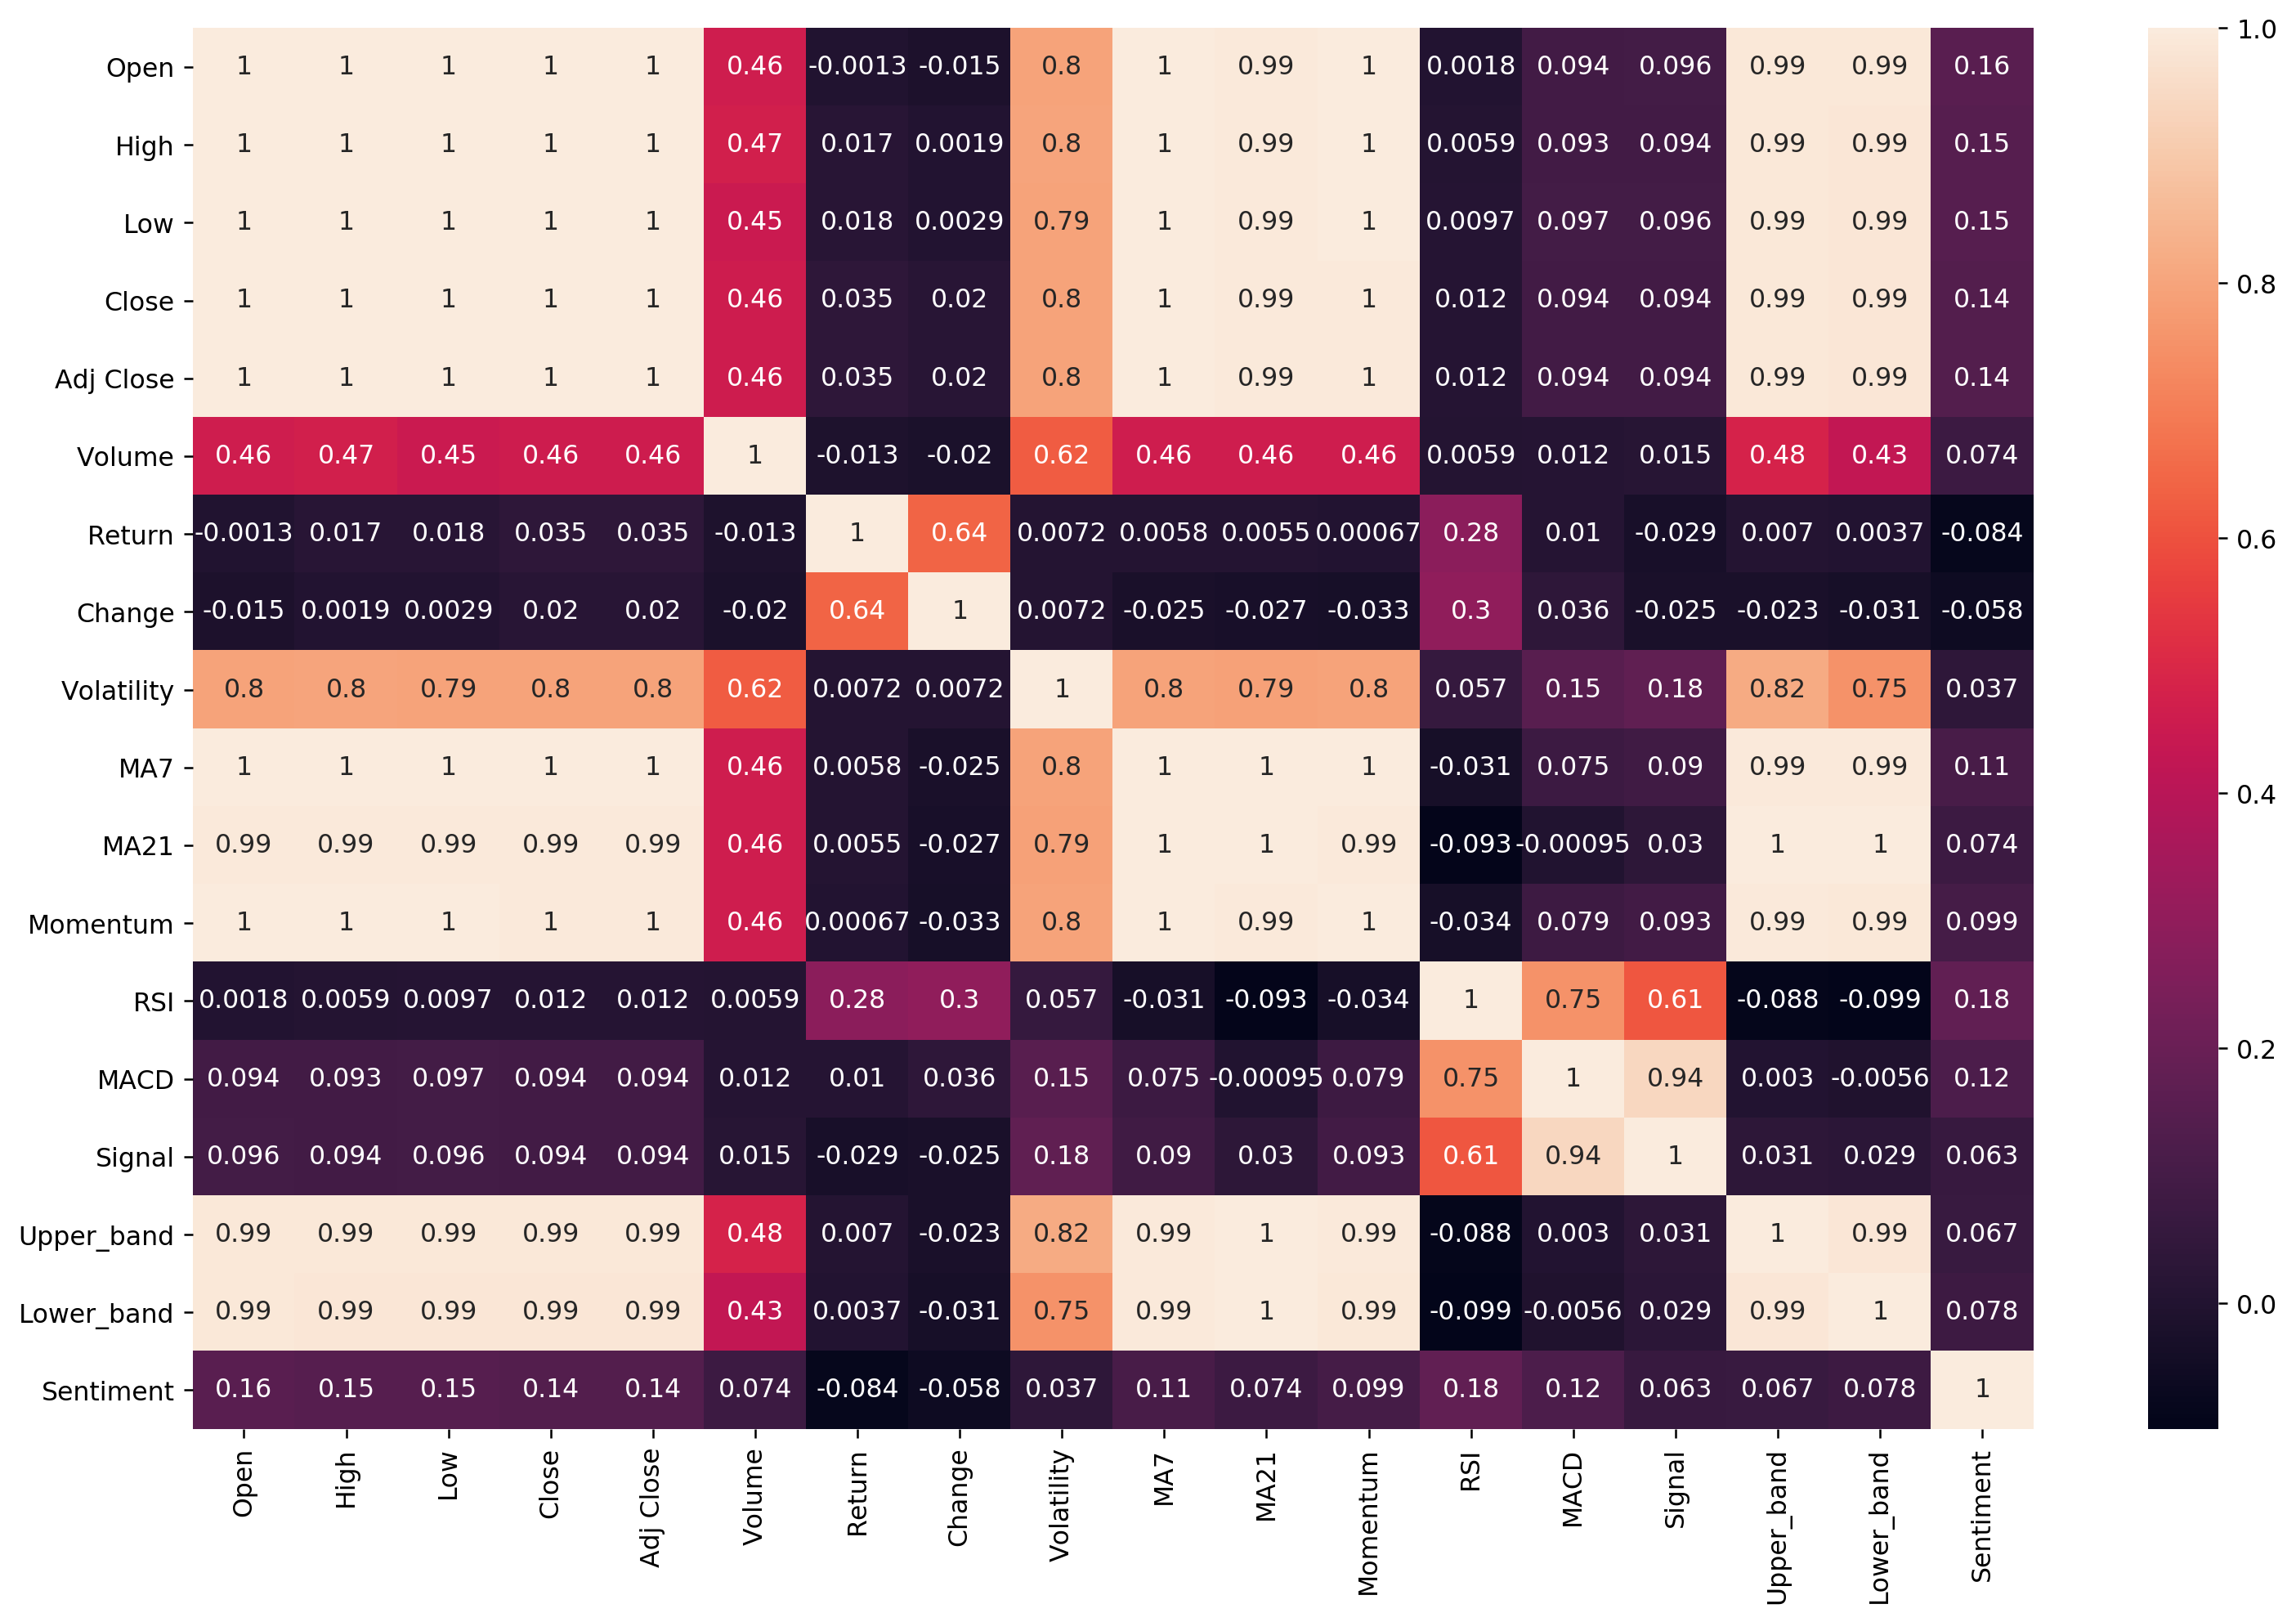

In [26]:
plt.figure(figsize=(16,10))
sns.heatmap(stocks['tsla'].corr(), annot=True)
plt.show()

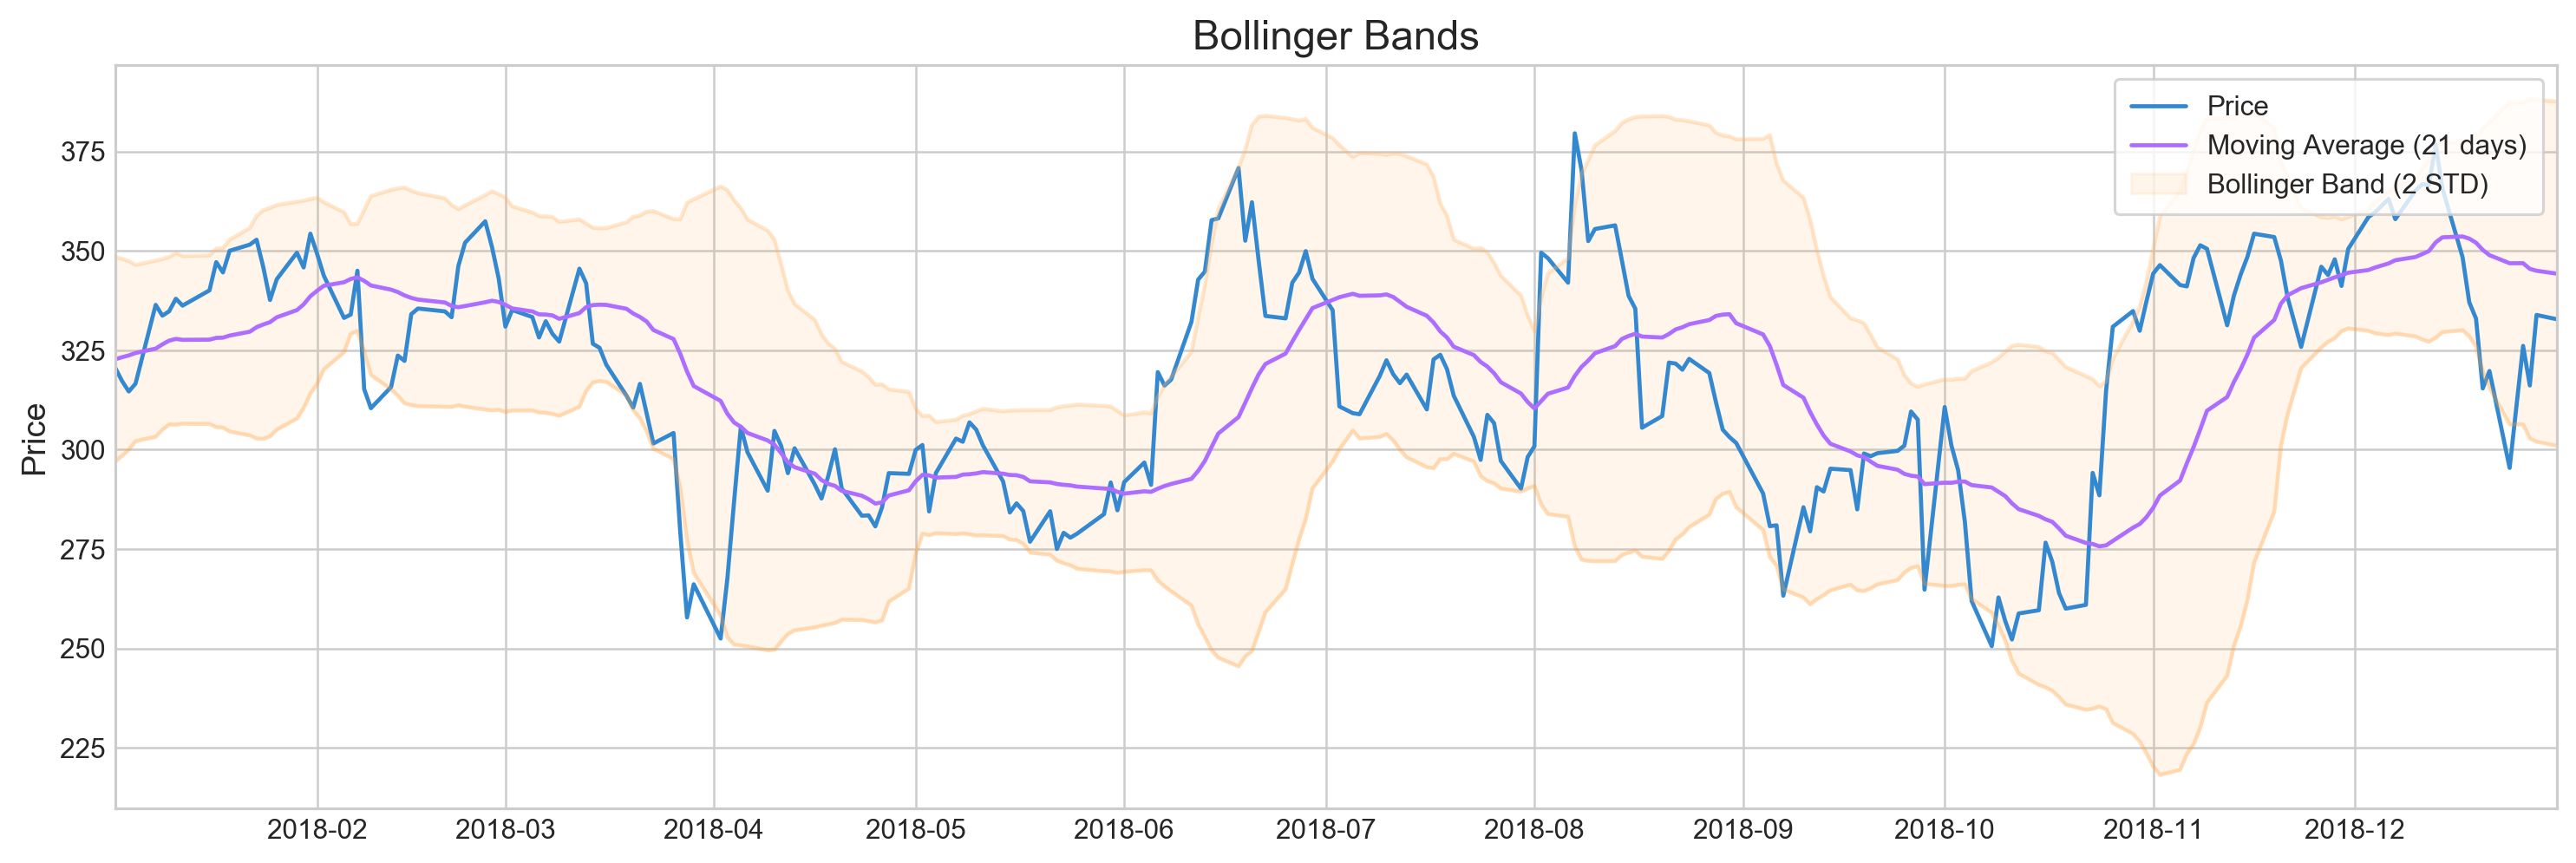

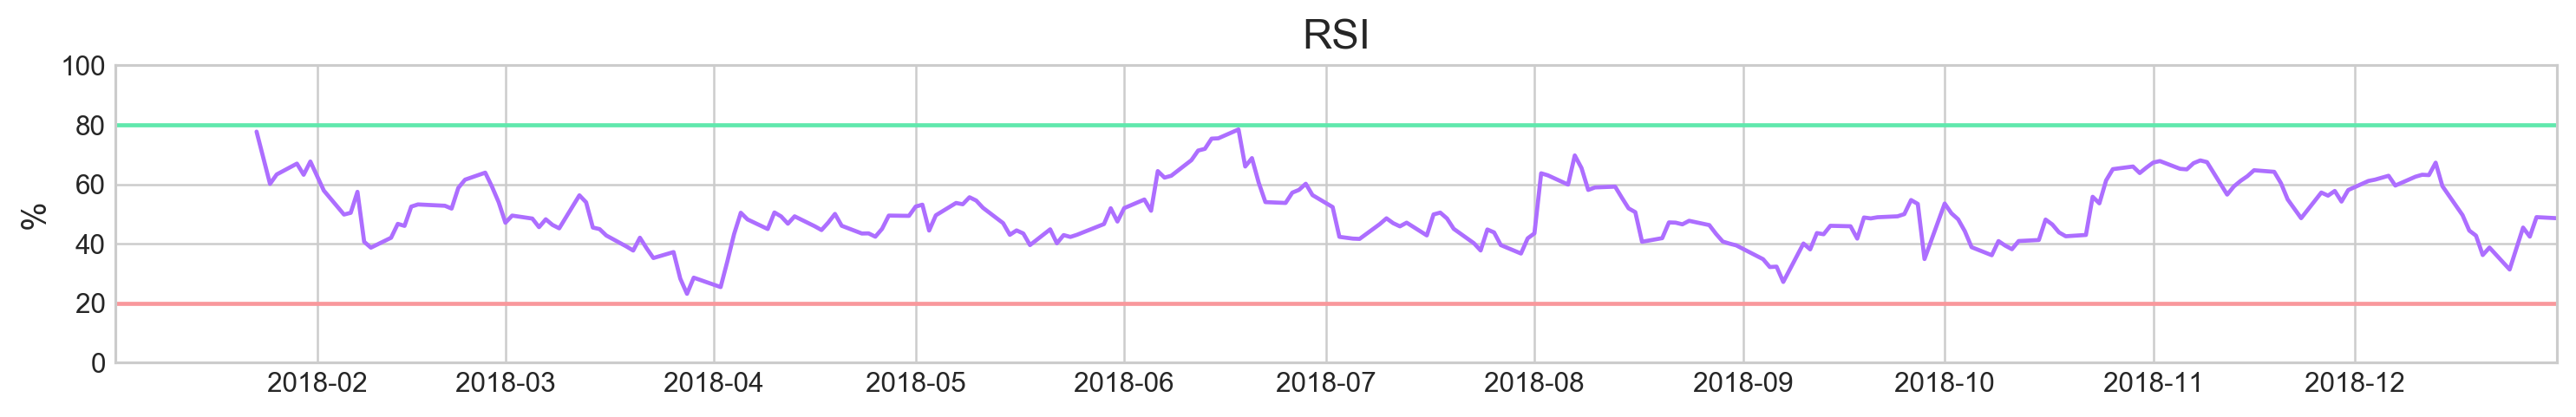

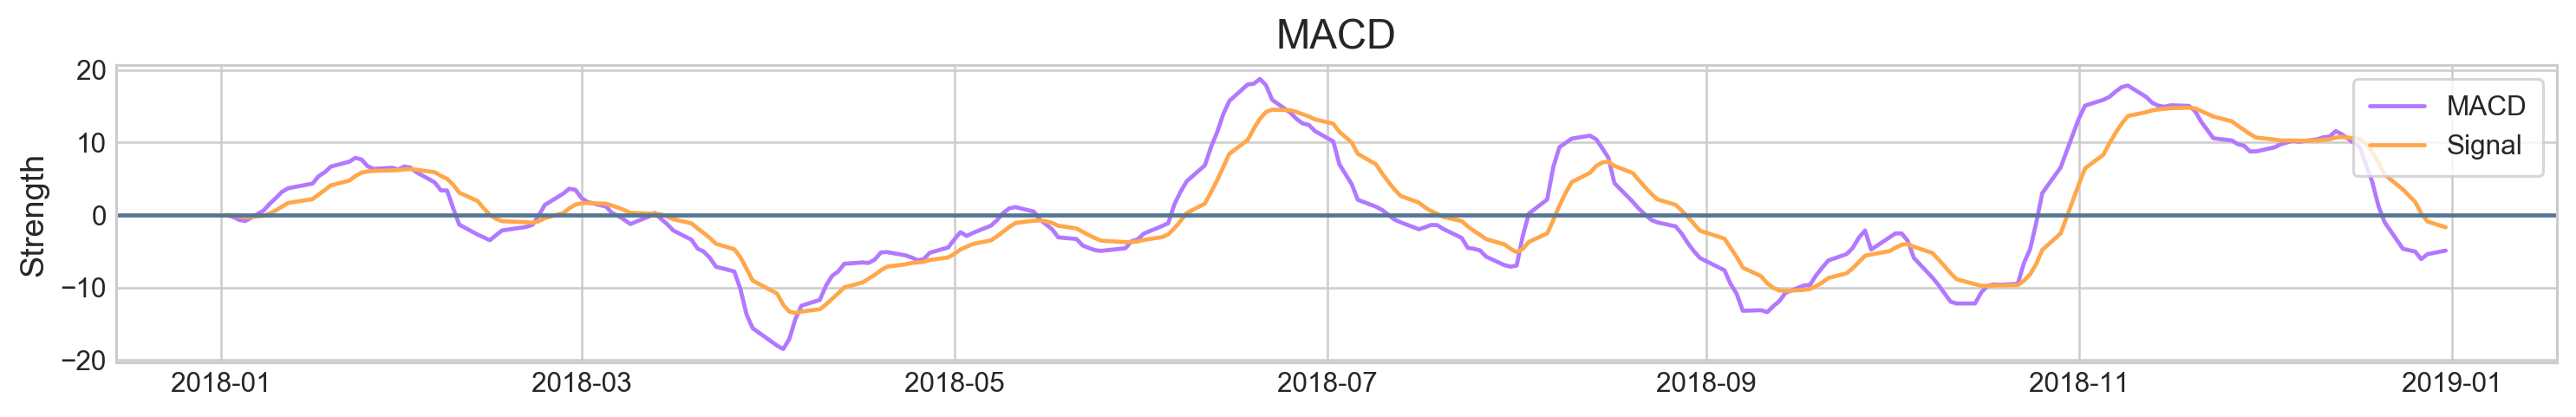

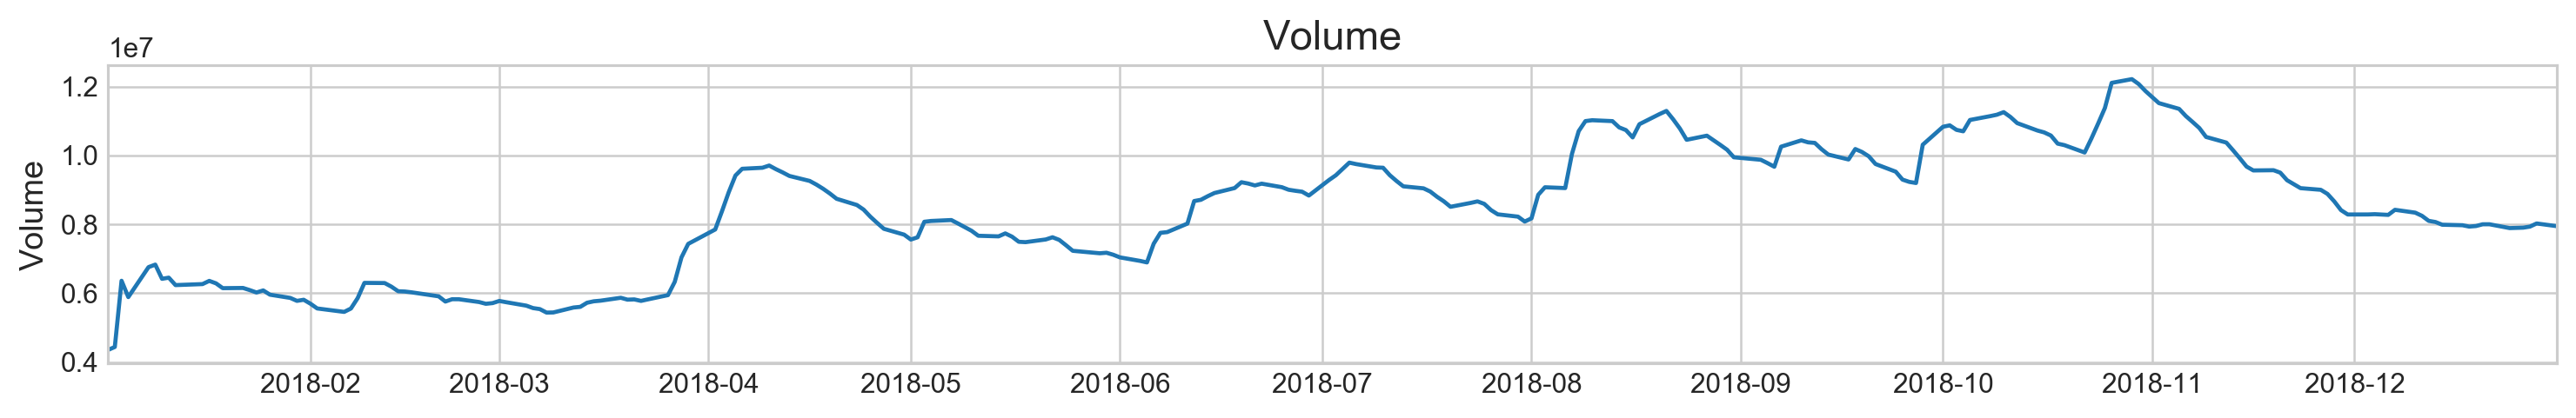

In [47]:
plotting.bollinger_bands(stocks['tsla'].loc['2018':'2018'])

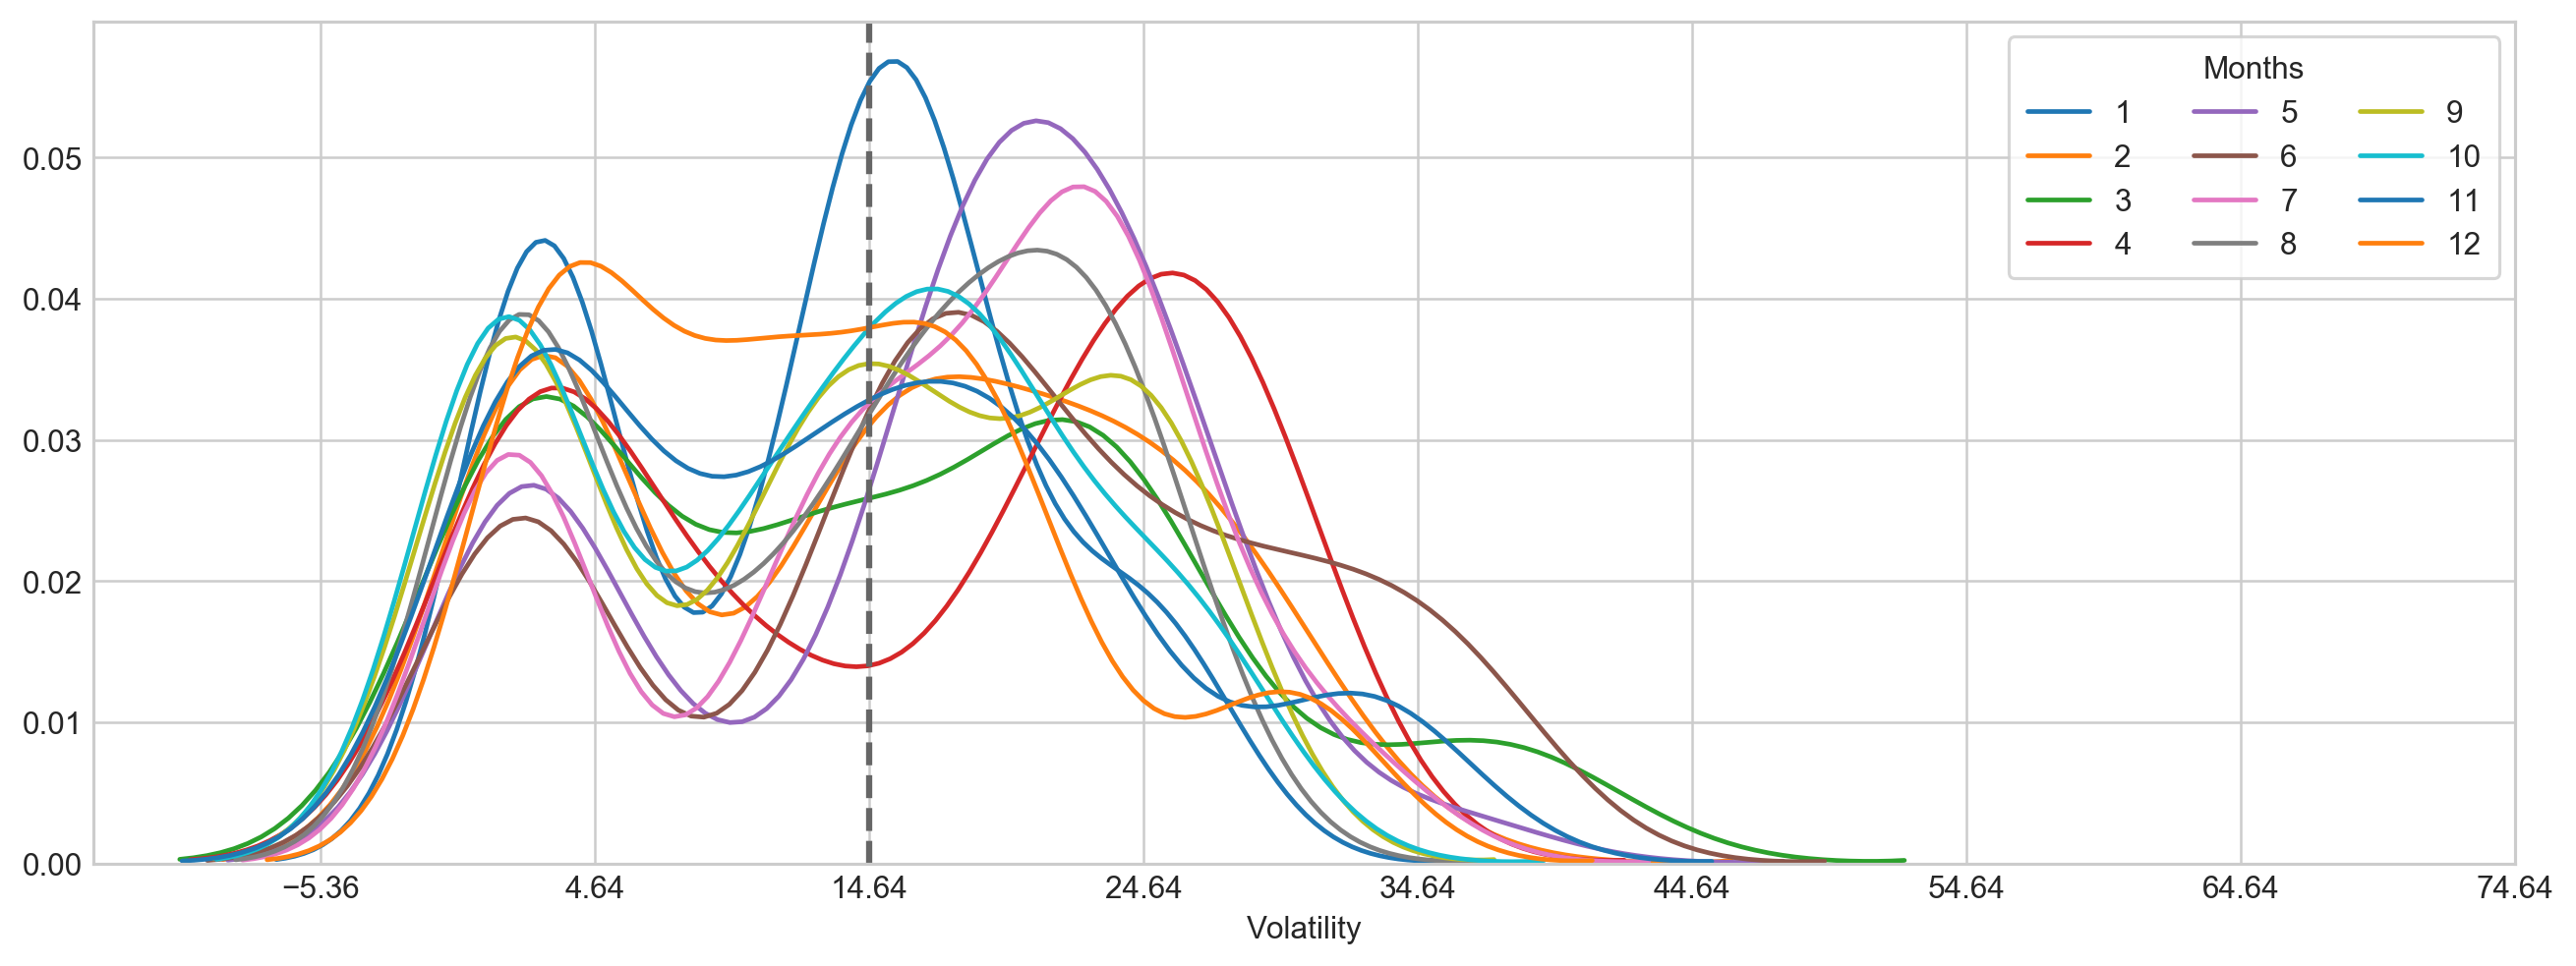

In [117]:
plt.figure(figsize=(14,5))
for i in range(1,13):
    volatility = stocks['tsla'][stocks['tsla'].index.month==i].Volatility
    sns.distplot(volatility, hist=False, label=i)
    plt.legend(frameon=True, loc=1, ncol=3, fontsize=10, borderpad=.6, title='Months')
plt.axvline(stocks['tsla'].Volatility.mean(), color='#666666', ls='--', lw=2)
plt.xticks(list(plt.xticks()[0]) + stocks['tsla'].Volatility.mean())
plt.show()

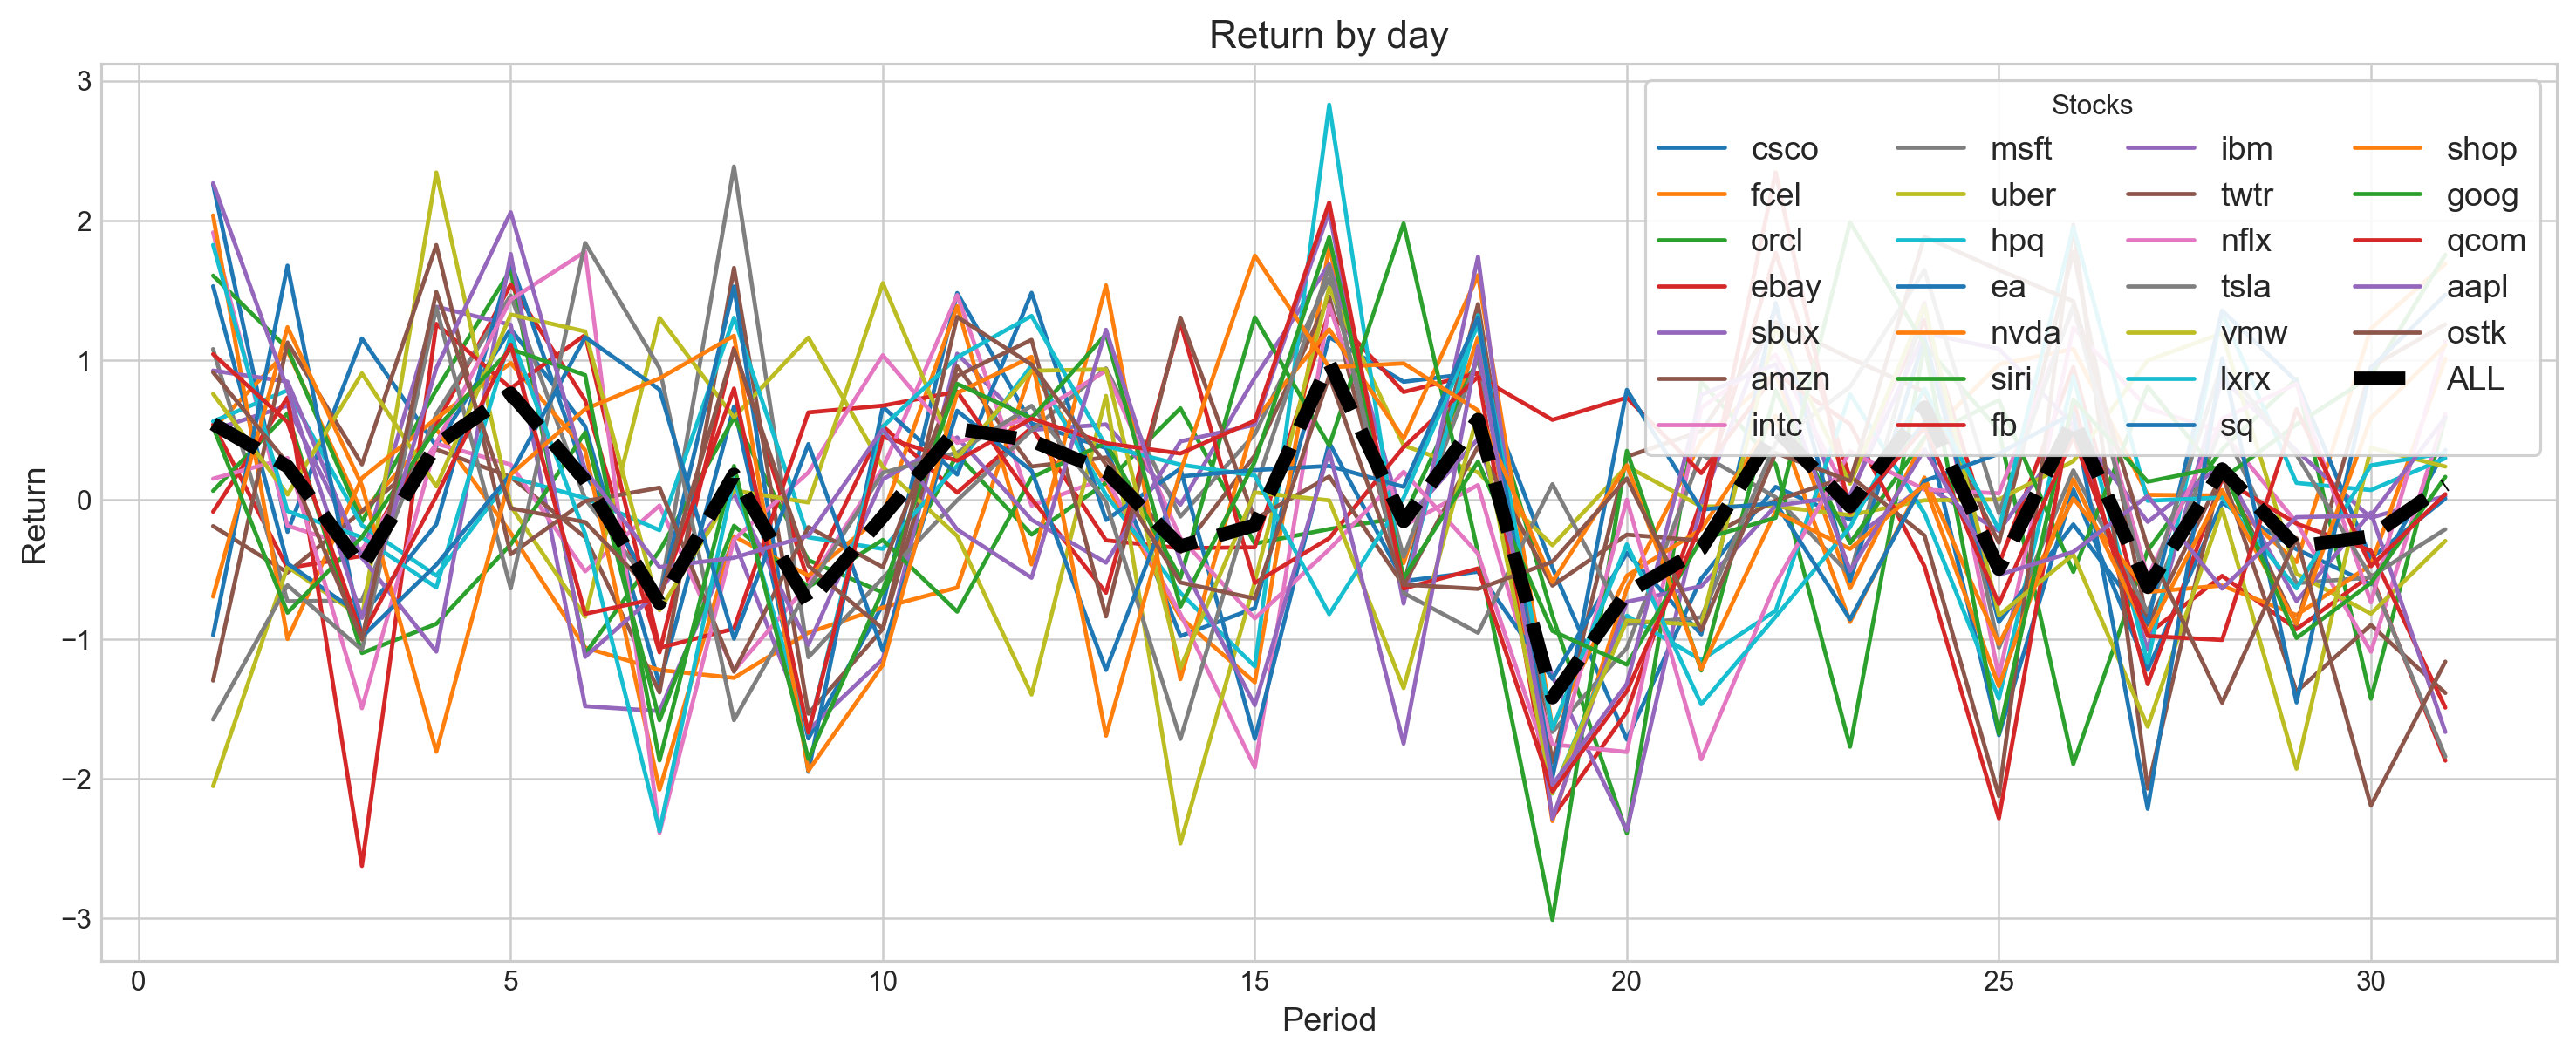

In [9]:
plotting.compare_stocks(stocks, value='Return', by='day', scatter=False)

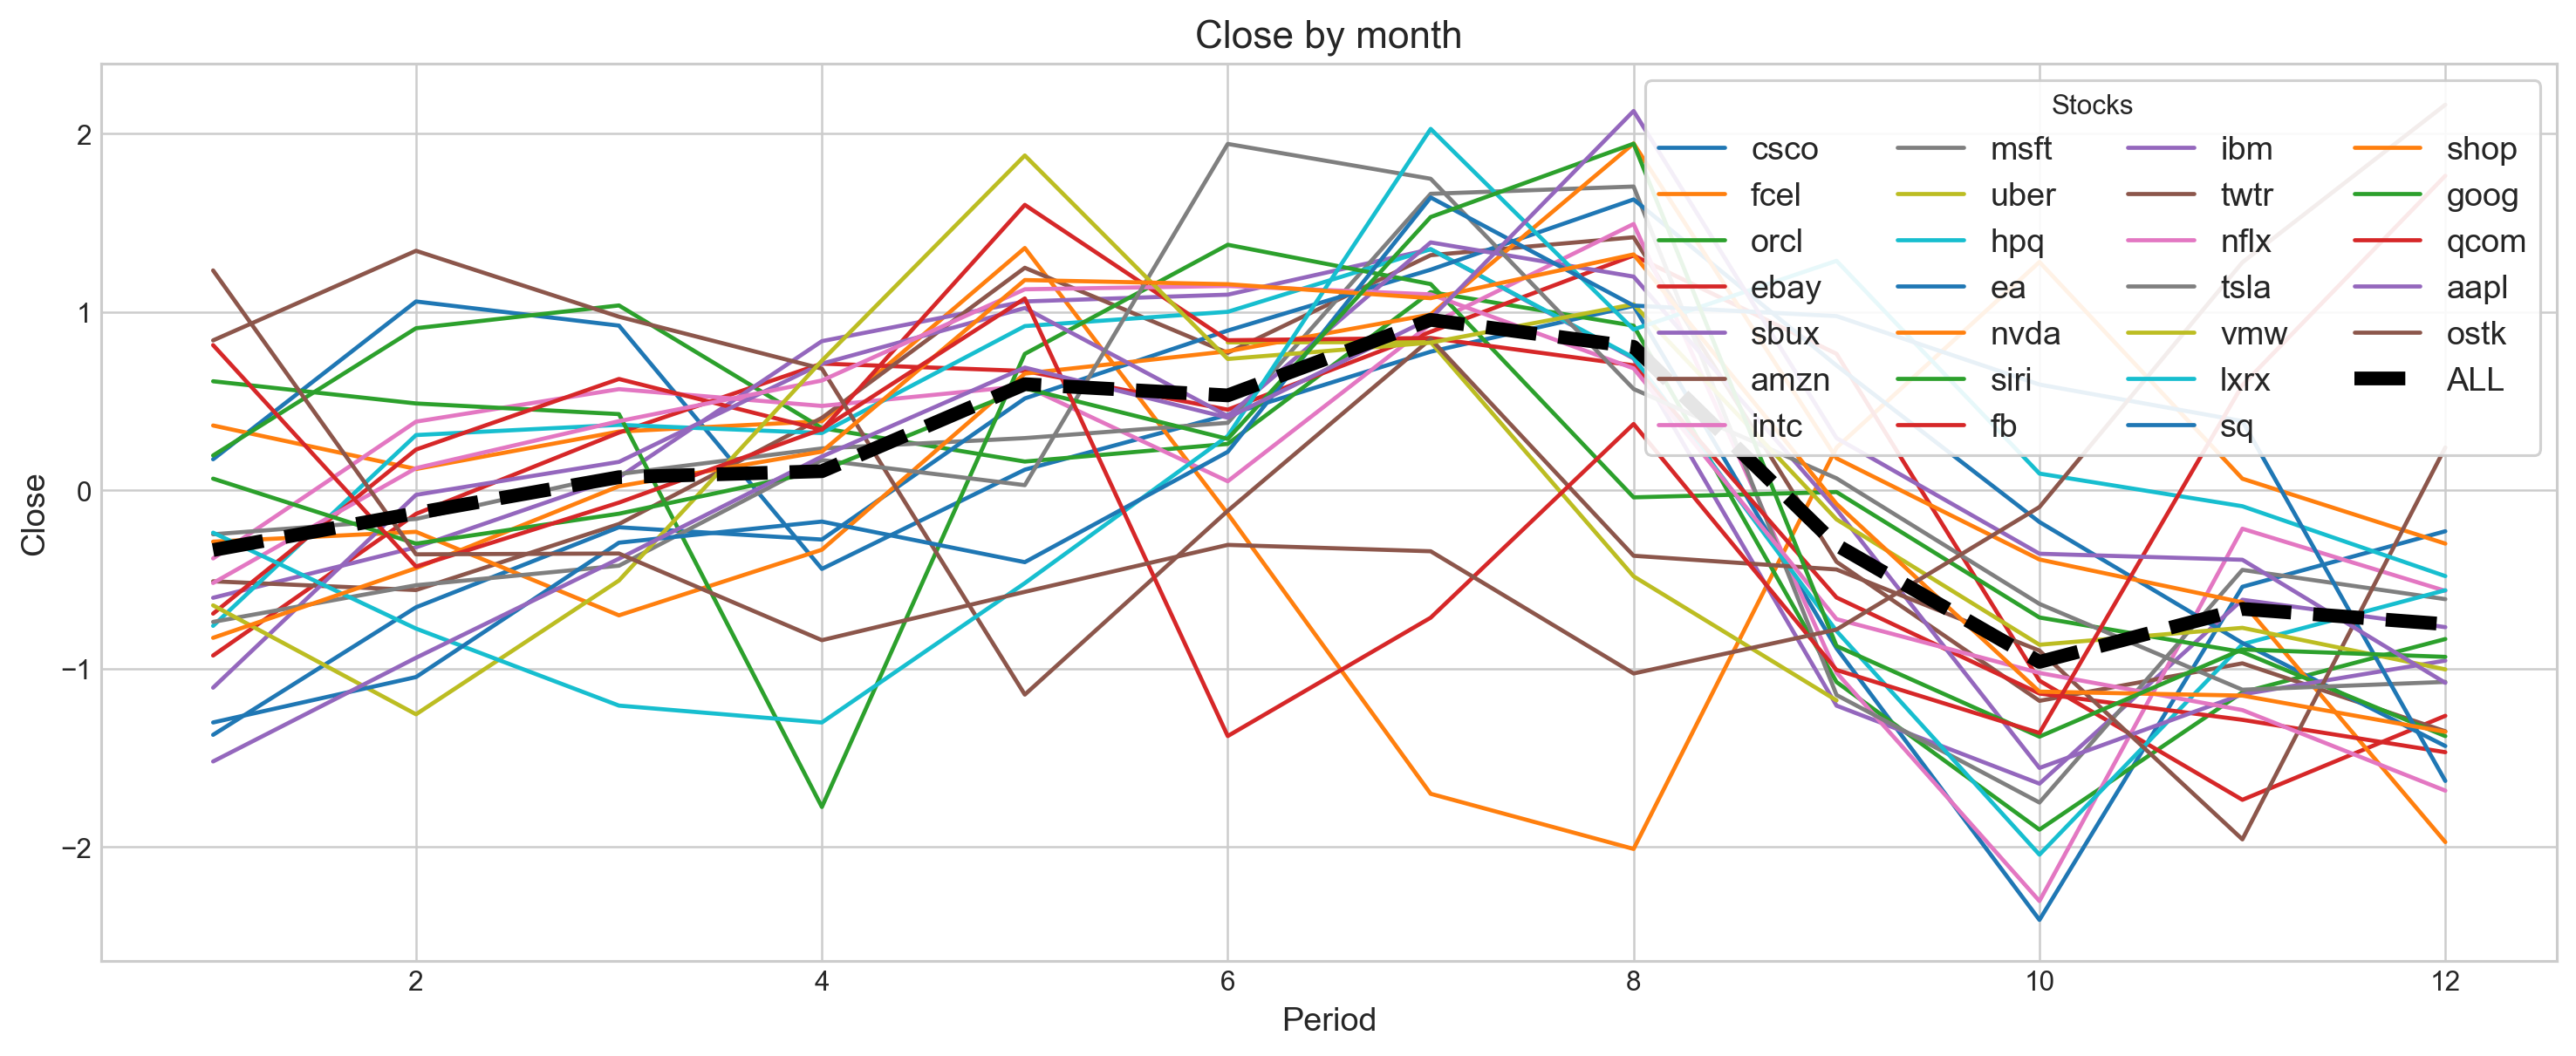

In [203]:
plotting.compare_stocks(stocks, value='Close', by='month', scatter=False)

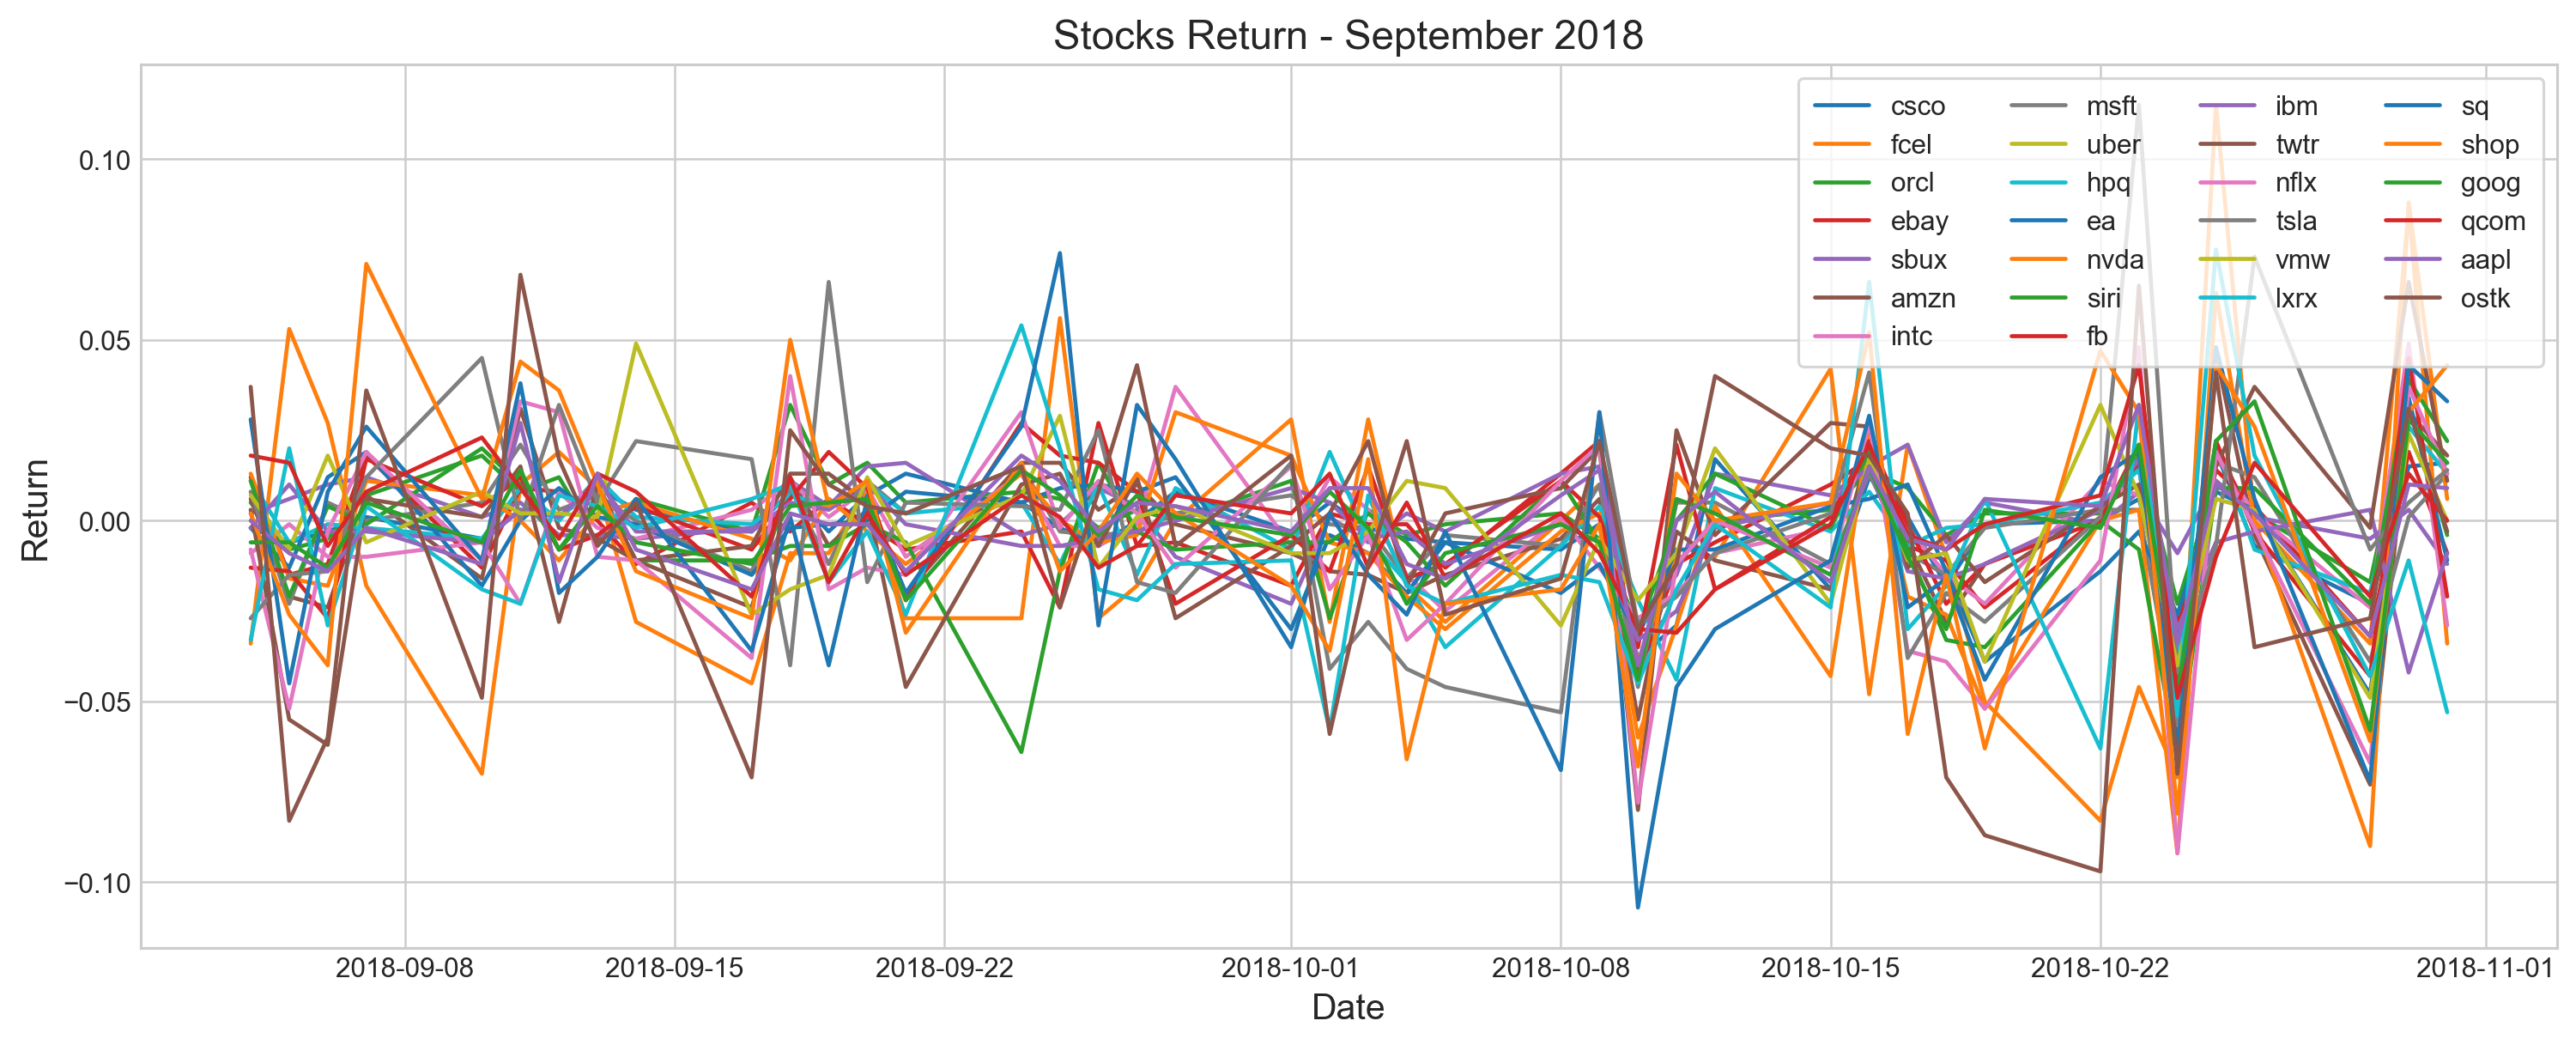

In [10]:
plt.rcParams['figure.dpi'] = 227
plt.figure(figsize=(16,6))
plt.style.use('seaborn-whitegrid')
for i in stocks:
    plt.plot(stocks[i].loc['2018-9':'2018-10'].Return, label=i)
    plt.legend(frameon=True, loc=1, ncol=4, fontsize=10, borderpad=.6)
plt.title('Stocks Return - September 2018', fontSize=15)
plt.xlabel('Date', fontSize=13)
plt.ylabel('Return', fontSize=13)
plt.show()

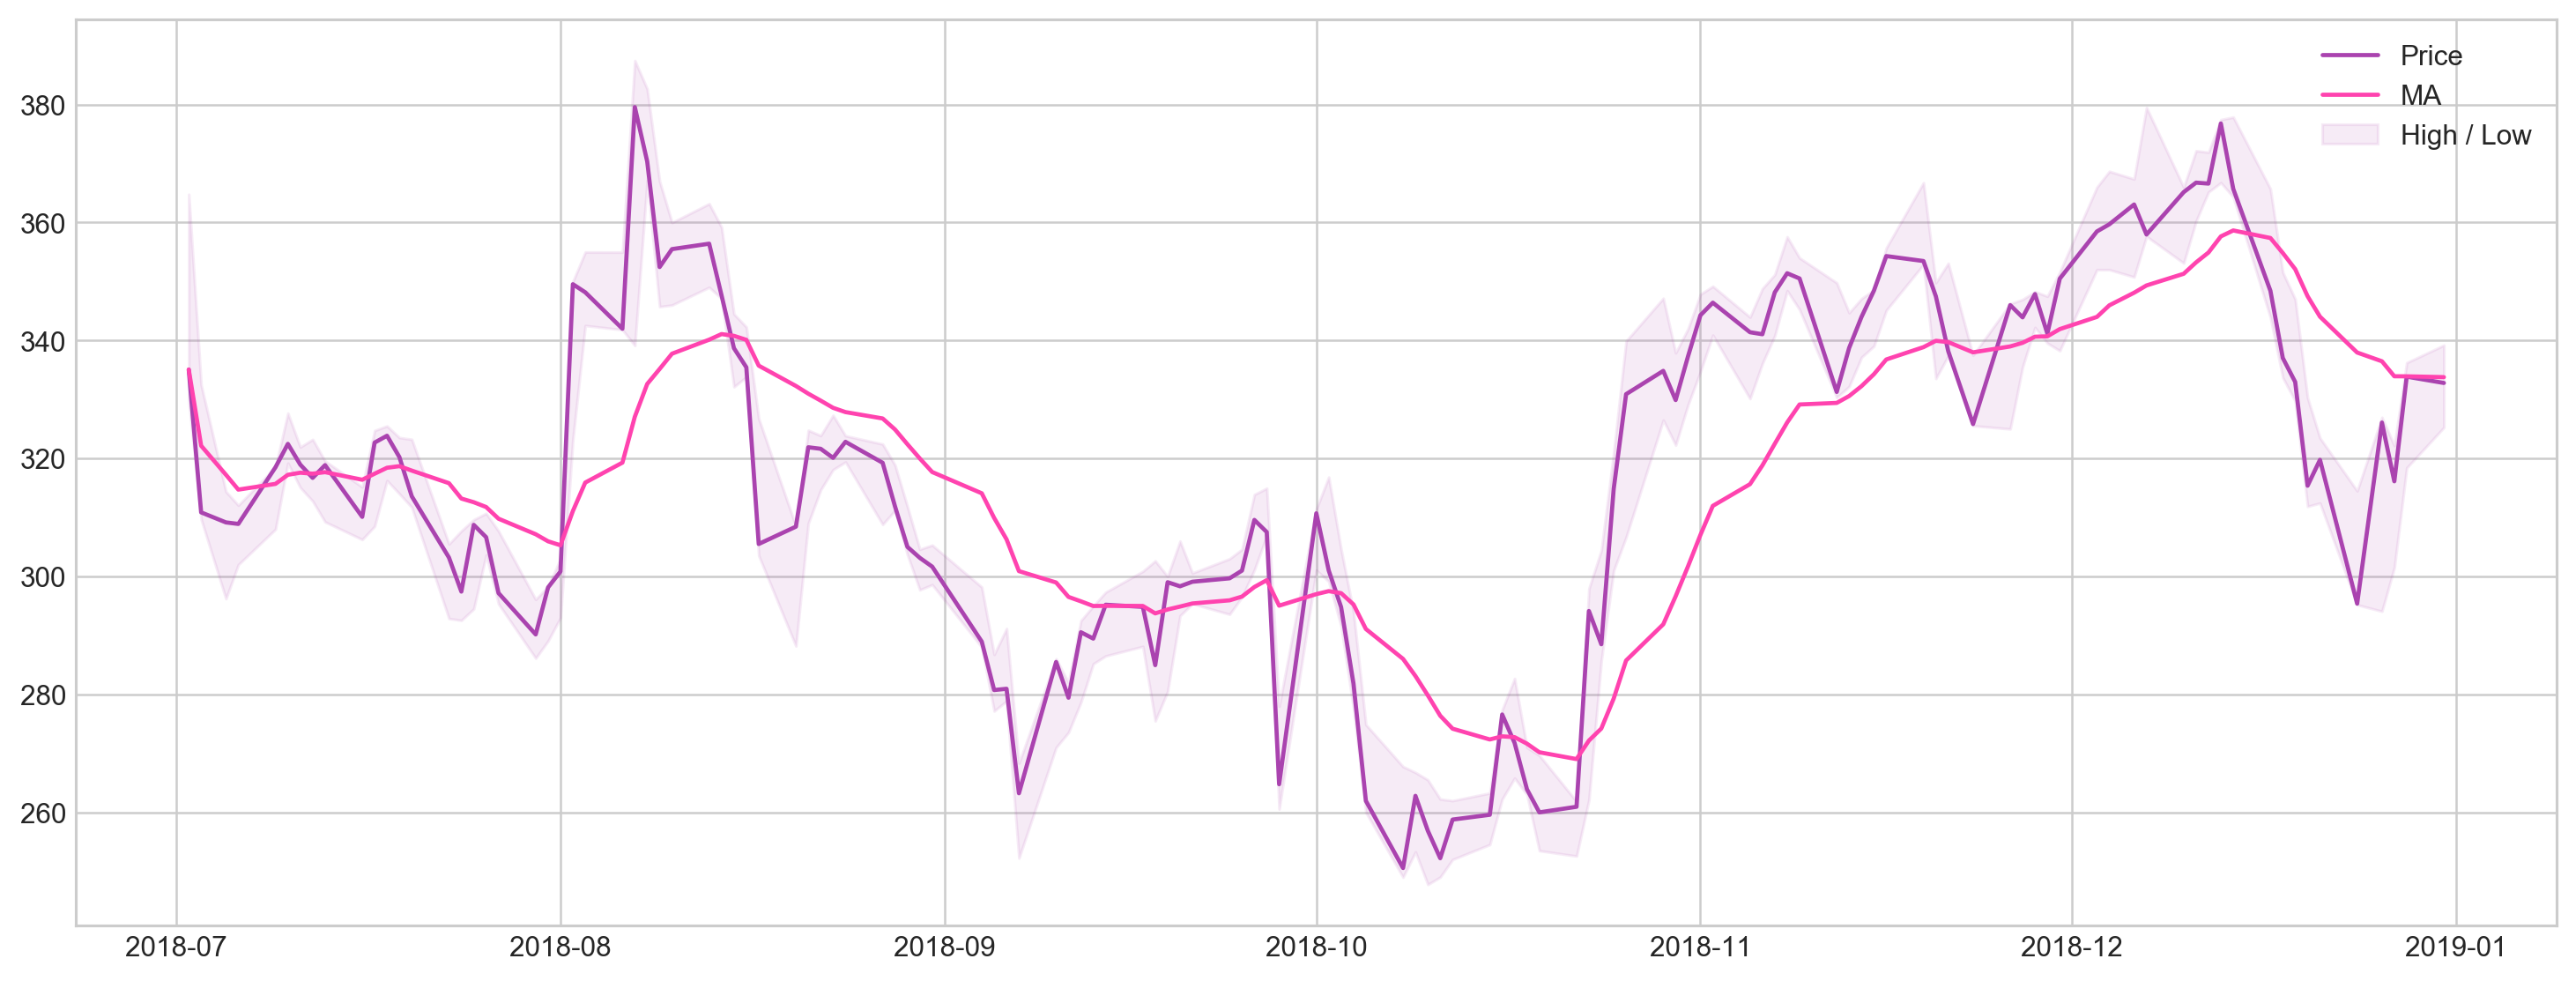

In [286]:
plt.figure(figsize=(16,6))

s = stocks['tsla'].loc['2018-7':'2018']
u = s.High
l = s.Low
plt.fill_between(s.index, u, l, color='#af43af', alpha=0.1, label='High / Low')
plt.plot(s.Close, color='#aa43af', label='Price')
plt.plot(s.Close.ewm(7).mean(), color='#ff43af', label='MA')
plt.legend(loc=1)
plt.show()

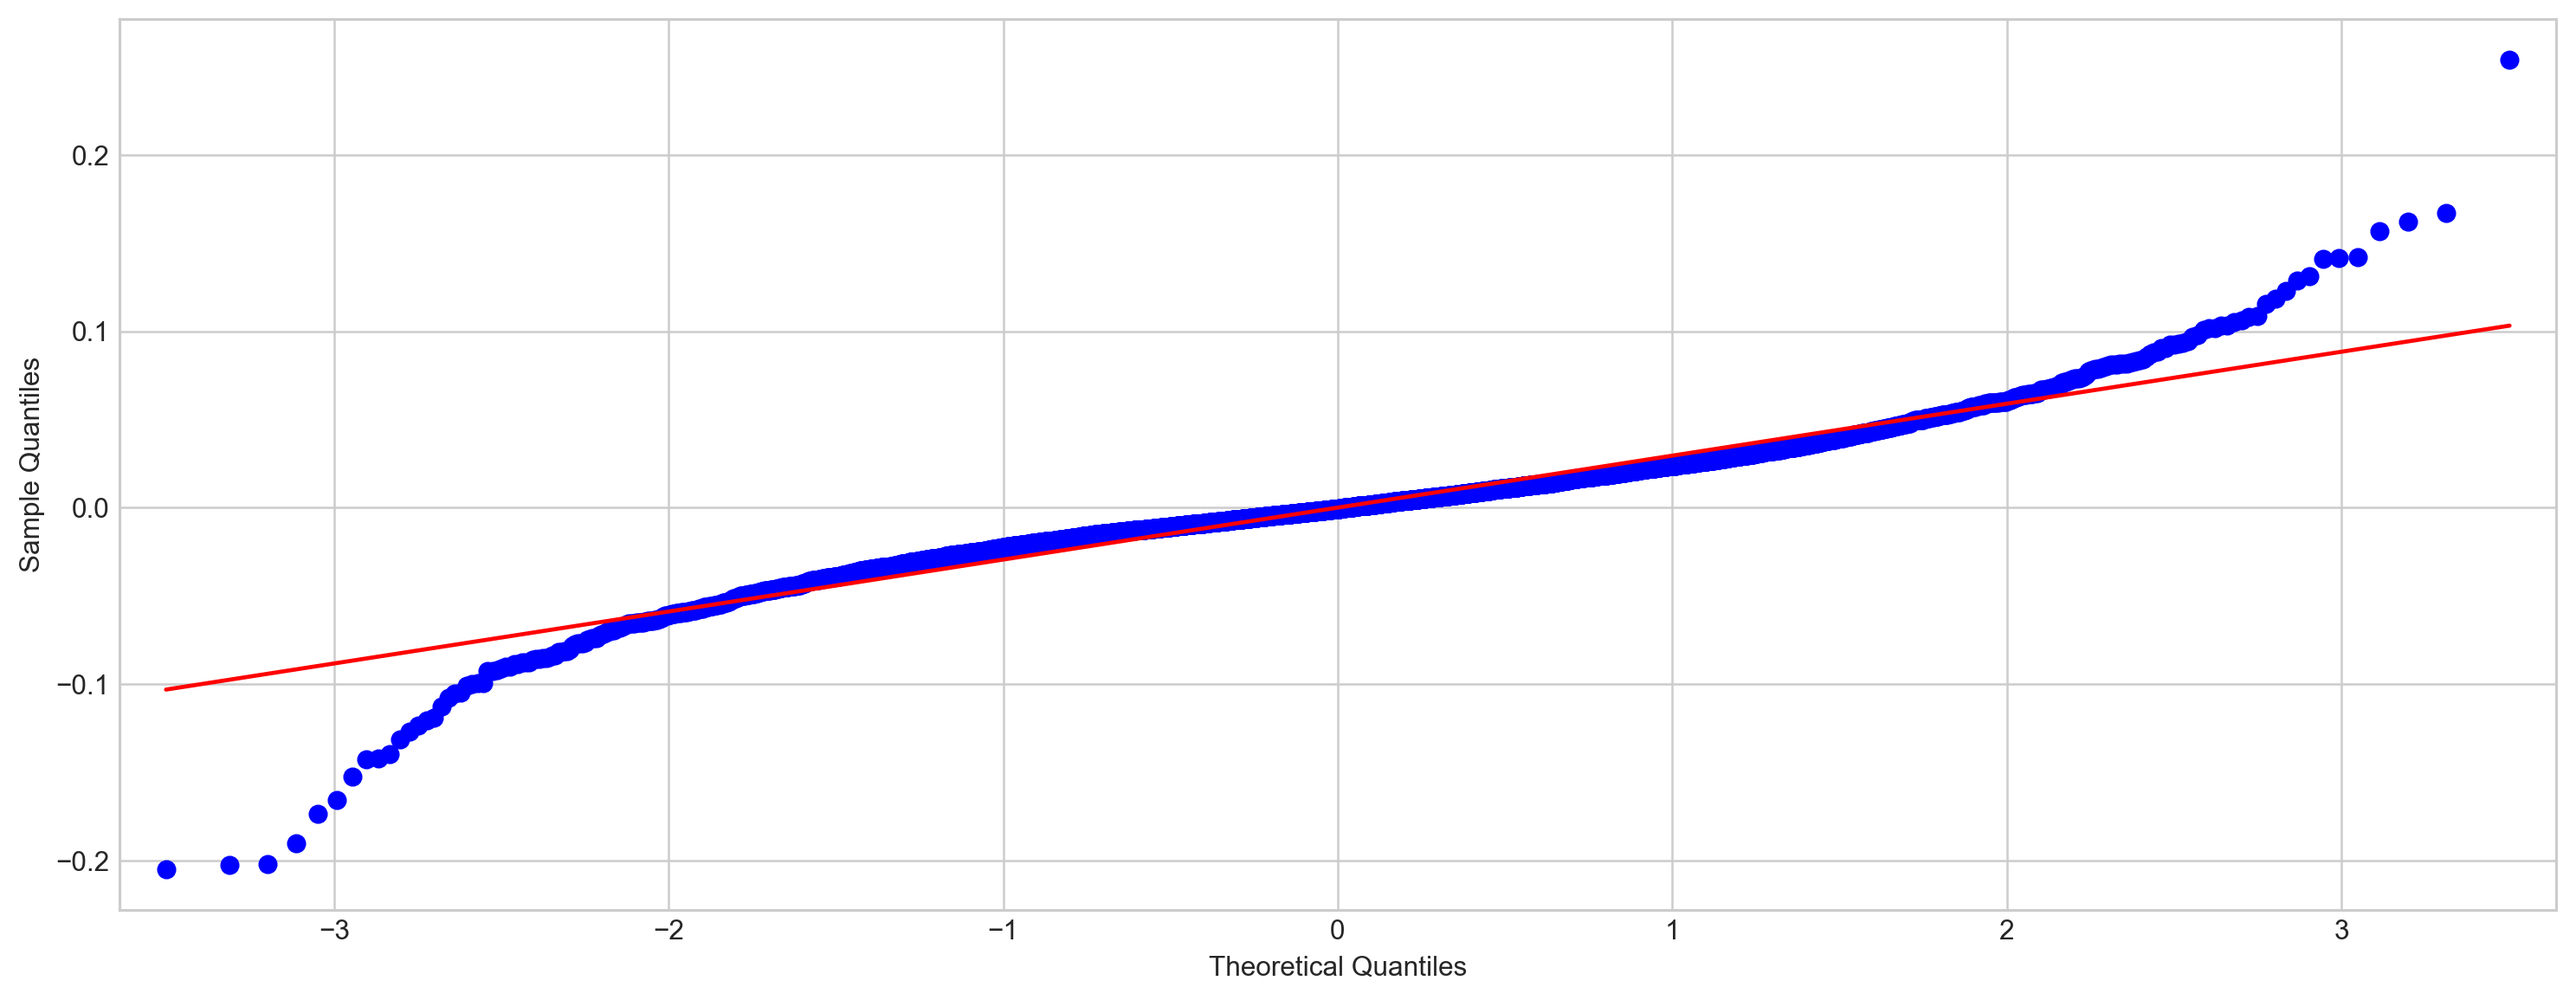

In [288]:
sm.qqplot(stocks['nflx'].Return.dropna(), line='s', scale=1)
plt.rcParams['figure.figsize'] = [16.0, 6.0]
plt.show()